# Exploratory Data Analysis (EDA)

 - **Visualizations:** Using matplotlib, seaborn, or plotly for interactive visualizations.
   - ***Distributions:*** Checking for sales and customer behavior distributions.
   - ***Correlation Analysis:*** Assessing correlation between sales, customers, holidays, promotions.
   - ***Time Series Trends:*** Ploting trends over time, especially around holidays and promo periods.

#### Directory setup

Allowing for imports from modules located in the parent directory 

by modifies the Python path to include the parent directory of the current working directory, 

- `os.path.dirname(os.getcwd())`: Retrieves the parent directory of the current working directory.
- `sys.path.insert(0, ...)`: Inserts this parent directory at the start of `sys.path`, giving it priority for module imports.


In [1]:
import os
import sys

sys.path.insert(0,os.path.dirname(os.getcwd()))

#### Importing required modules

In [2]:
import pandas as pd
from scripts.data_accessing import DataAccessor
from scripts.data_preprocessing import DataProcess

In [3]:
# Path to the data sets

data_path_sample="../Data/sample_submission.csv"
data_path_store="../Data/store.csv"
data_path_train="../Data/train.csv"
data_path_test="../Data/test.csv"

#### Reading data and Checking the basic structure of the dataset:

In [4]:
sampleData=DataAccessor(data_path_sample)
storeData=DataAccessor(data_path_store)
trainData=DataAccessor(data_path_train)
testData=DataAccessor(data_path_test)

In [5]:
# Accessing Data

df_sample=sampleData.read_data()
df_store=storeData.read_data()
df_train=trainData.read_data()
df_test=testData.read_data()

d:\10Academy\Week4\scripts\data_accessing.py:34: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(self.data_path)


In [6]:
# Dispalying head or top data

df_sample.head()

,Id,Sales
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [7]:
# Dispalying head or top data

df_store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [8]:
# Dispalying head or top data

df_train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [9]:
# Dispalying head or top data

df_test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [10]:
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [12]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             41088 non-null  int64  
 1   Store          41088 non-null  int64  
 2   DayOfWeek      41088 non-null  int64  
 3   Date           41088 non-null  object 
 4   Open           41077 non-null  float64
 5   Promo          41088 non-null  int64  
 6   StateHoliday   41088 non-null  object 
 7   SchoolHoliday  41088 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 2.5+ MB


In [13]:
df_train.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [14]:
df_test.isnull().sum()

Id                0
Store             0
DayOfWeek         0
Date              0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
dtype: int64

In [15]:
df_store.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

#### Preprocessing Implementation
 - preprocessing for the train, store, and test datasets.

In [16]:
processing=DataProcess()

store,train,test=processing.merging_store(df_store,df_train,df_test)

In [17]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1115 non-null   float64
 4   CompetitionOpenSinceMonth  1115 non-null   float64
 5   CompetitionOpenSinceYear   1115 non-null   float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            1115 non-null   float64
 8   Promo2SinceYear            1115 non-null   float64
 9   PromoInterval              1115 non-null   object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [18]:
store.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [19]:
# train data after store is merged on it
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1017209 no

In [20]:
# test data after merging with store
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Id                         41088 non-null  int64         
 1   Store                      41088 non-null  int64         
 2   DayOfWeek                  41088 non-null  int64         
 3   Date                       41088 non-null  datetime64[ns]
 4   Open                       41088 non-null  float64       
 5   Promo                      41088 non-null  int64         
 6   StateHoliday               41088 non-null  object        
 7   SchoolHoliday              41088 non-null  int64         
 8   StoreType                  41088 non-null  object        
 9   Assortment                 41088 non-null  object        
 10  CompetitionDistance        41088 non-null  float64       
 11  CompetitionOpenSinceMonth  41088 non-null  float64       
 12  Comp

In [21]:
train,test, preprocessor=processing.feature_engineering(train, test)

In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 25 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1017209 no

- Create a preprocessor pipeline for categorical and numerical features

In [23]:
preprocessor

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['CompetitionDistance', 'CompetitionOpenTime',
                                  'Promo2OpenTime', 'DayOfWeek']),
                                ('cat', OneHotEncoder(),
                                 ['StoreType', 'Assortment', 'StateHoliday',
                                  'PromoInterval'])])

### Exploratory Data Analysis (EDA) with Visualizations
  - Approaching EDA, focusing customer purchasing behavior, sales trends, and promo effectiveness.

##### Check for Distribution of Promotions in Training and Test Sets

- **Goal**: Ensure similar distribution of promotions between training and test datasets.
- **Approach**: 
  - Analyze the `Promo` column in both datasets.
  - Compare the frequency of stores running promotions.


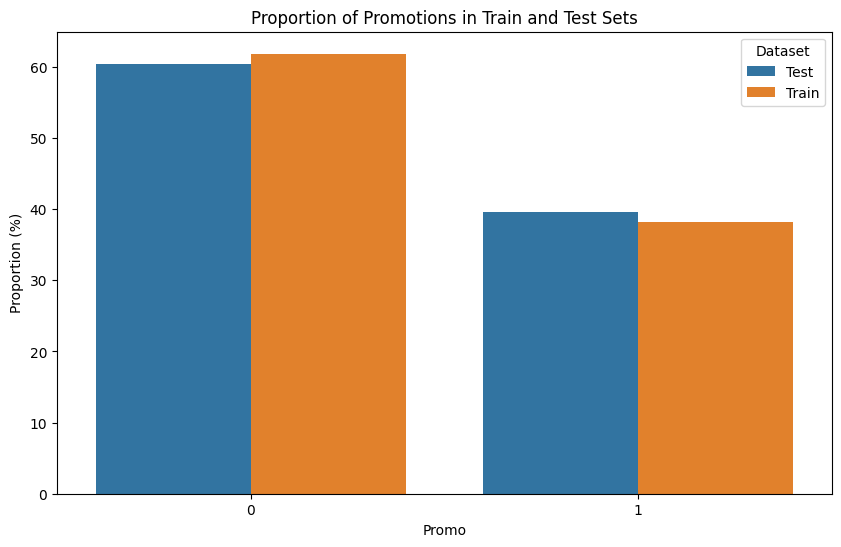

In [24]:
processing.prom_distribution(train,test)

##### Check & Compare Sales Behavior Before, During, and After Holidays

- **Goal**: Assess the impact of holidays on sales.
  - Analyze `StateHoliday` and `SchoolHoliday` effects on sales.
  - Create time series plots to visualize sales patterns before, during, and after holidays.


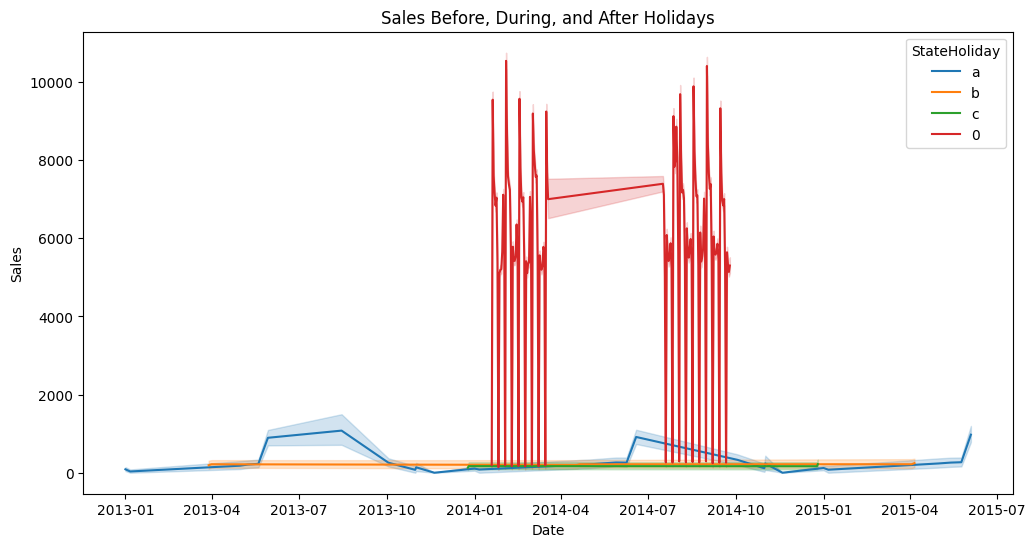

In [25]:
processing.sales_behaviorOnholiday(train)

##### Identify Seasonal Purchase Behaviors (e.g., Christmas, Easter)

- **Goal**: Detect any seasonal trends in purchasing behavior.
  - Analyze sales around key holidays (e.g., Christmas, Easter).
  - Group by holiday periods to observe sales trends.


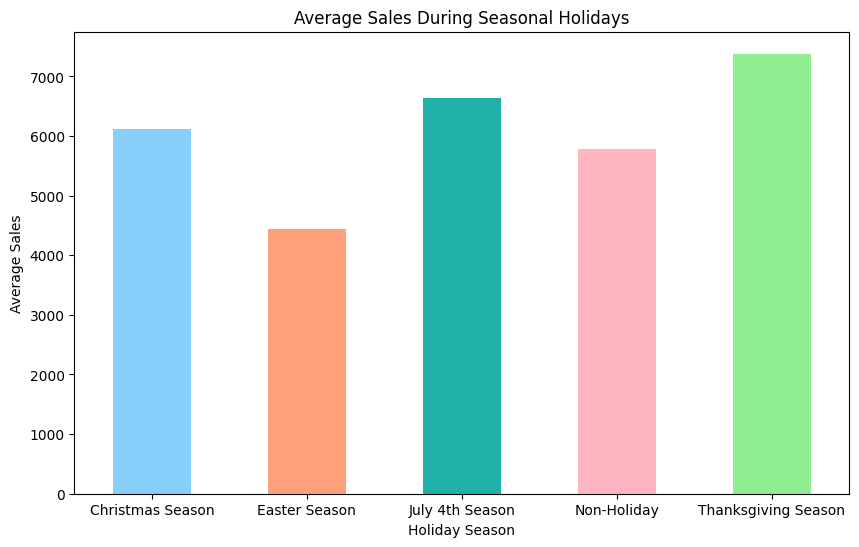

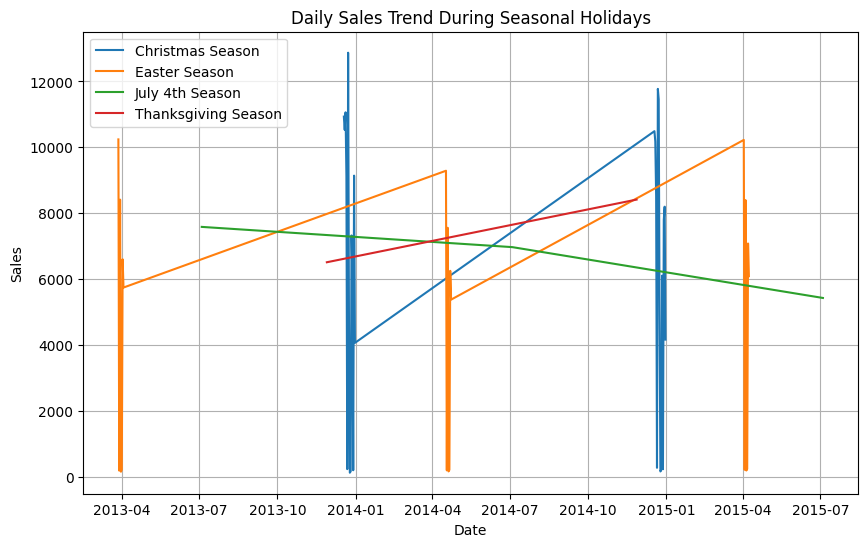

In [26]:
processing.Seasonal_Purchase_Behaviors(train)

##### Correlation Between Sales and Number of Customers

- Determine the relationship between sales and customer count.
  - Compute the correlation between the `Sales` and `Customers` columns.

Correlation between Sales and Customers: 0.8947107733017018


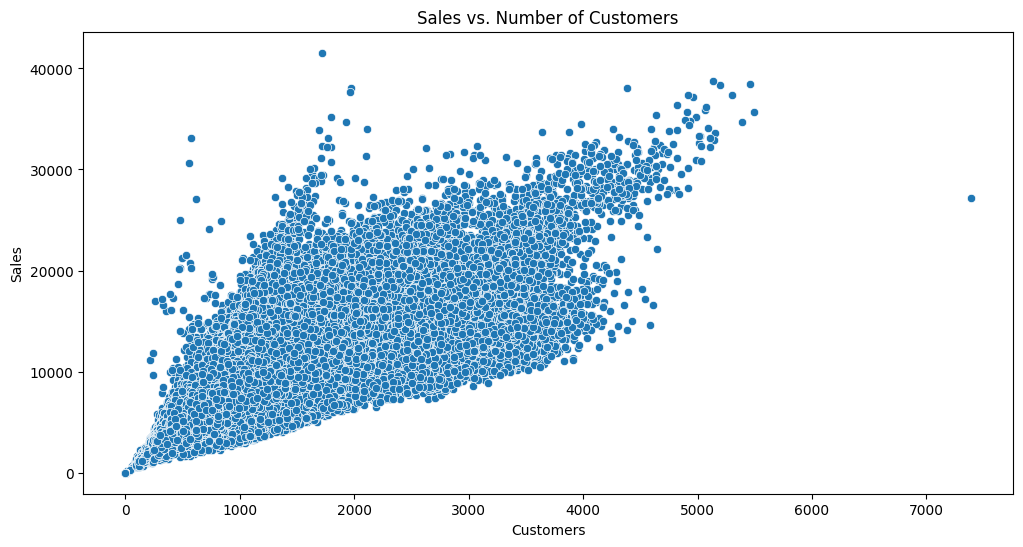

In [27]:
processing.sales_customer_correlation(train)

##### How Does Promo Affect Sales? Are Promos Attracting More Customers?
- **Approach**:
   - Group the data by Promo and check the mean and distribution of Sales and Customers.

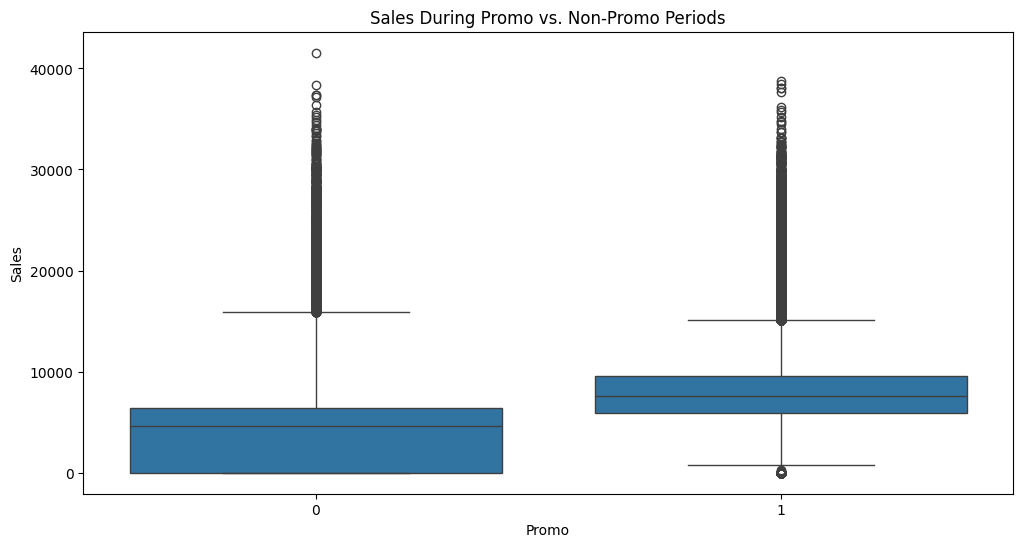

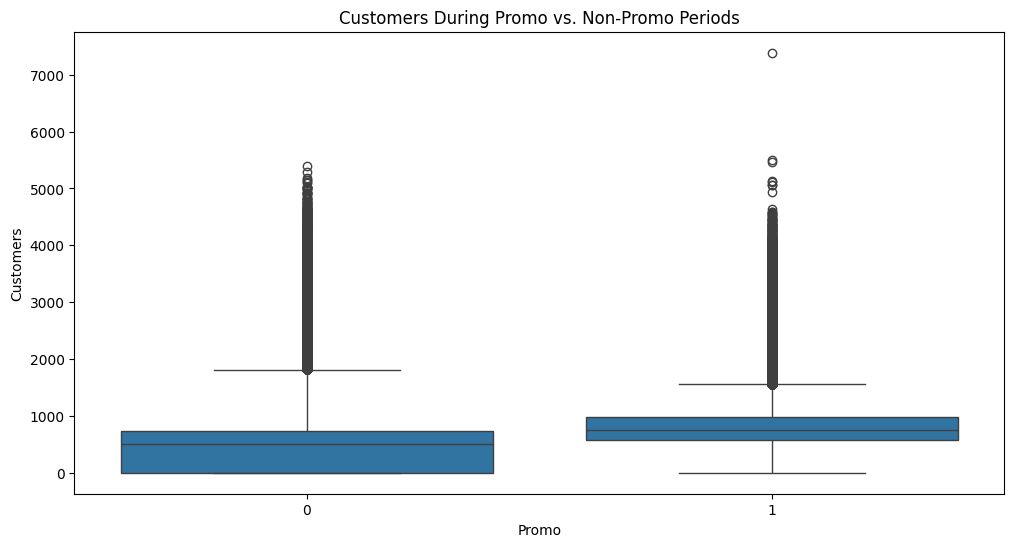

In [28]:
processing.Promosion_attract_On_sales(train)

##### Optimizing Promo Deployment Across Stores

- **Goal**: Determine how to deploy promotions more effectively across stores.
  - Analyze the sales response to promotions by grouping data by `StoreType` or `Assortment`.


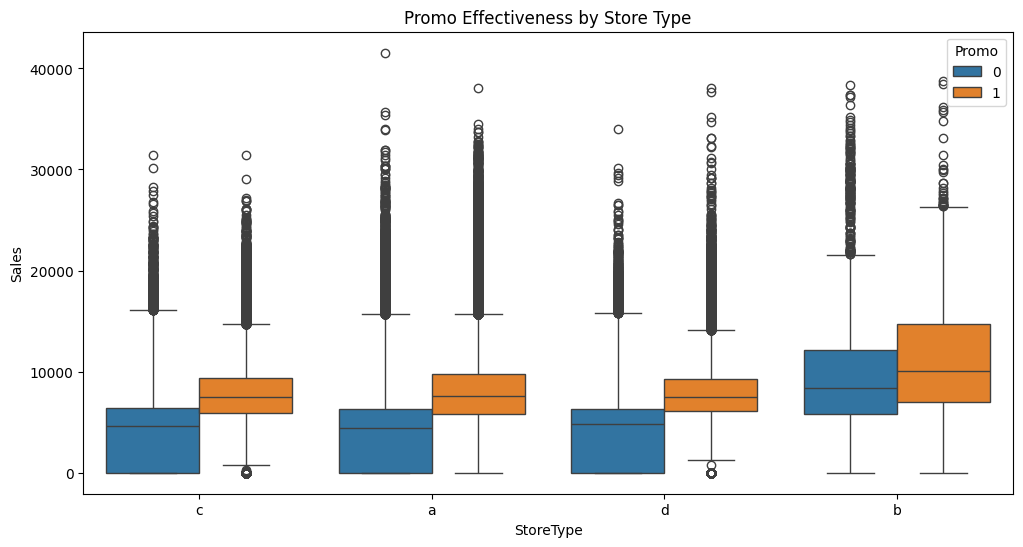

In [29]:
processing.promos_deployement(train)

##### Trends in Customer Behavior During Store Opening and Closing Times

- **Goal**: Examine how customer behavior varies with store opening and closing times.
  - Analyze the `Open` column to compare customer behavior on days when stores are open versus closed.


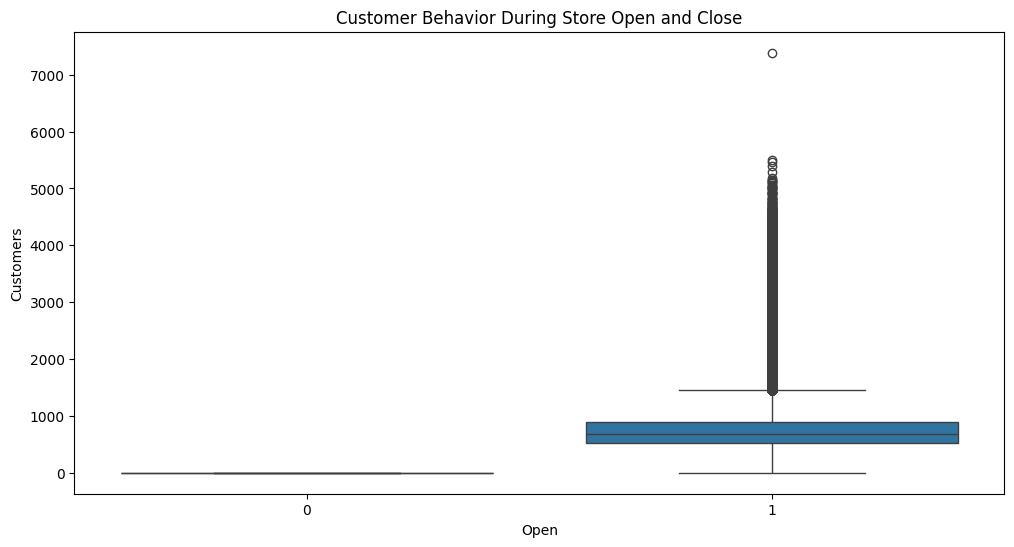

In [30]:
processing.store_closing_times(train)

##### Impact of Weekday Openings on Weekend Sales

- **Goal**: Identify stores open on all weekdays and assess how it influences weekend sales.
  - Filter stores that are open on all weekdays.
  - Analyze their sales behavior on weekends.


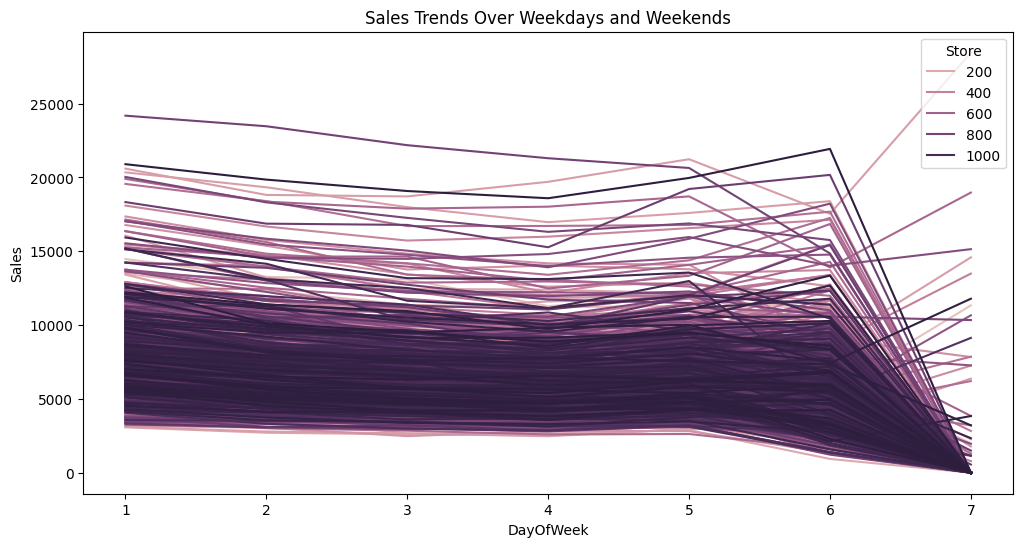

In [31]:
processing.stores_weekday_sales(train)

##### Effect of Assortment Type on Sales

- **Goal**: Understand how different assortment types influence sales.
  - Group data by the `Assortment` column and analyze the sales patterns.


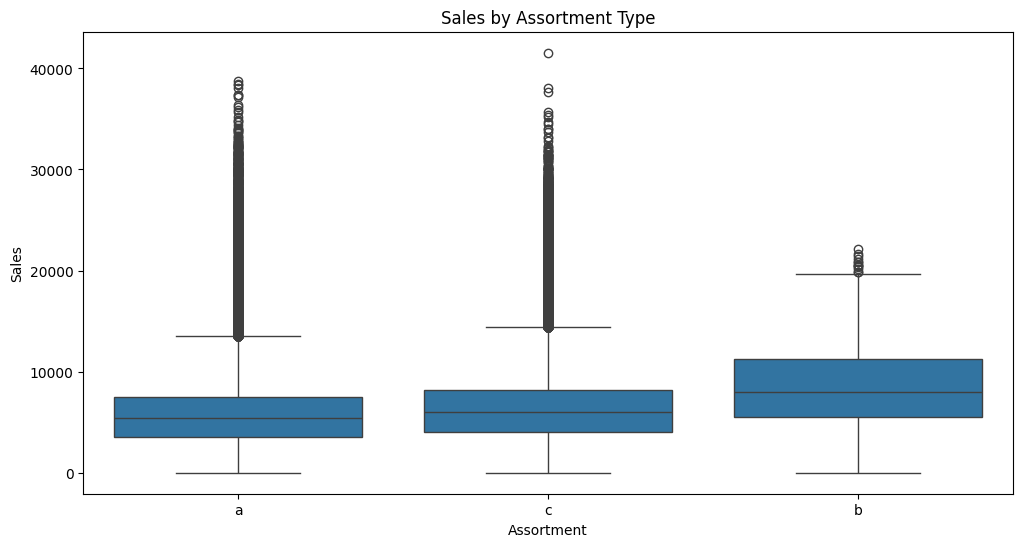

In [32]:
processing.self_assortment_type(train)

##### Impact of Competitor Distance on Sales

- **Goal**: Assess how the distance to the nearest competitor influences sales.
  - Analyze the correlation between `CompetitionDistance` and sales.
  - Investigate if shorter distances correlate with lower sales due to competition.


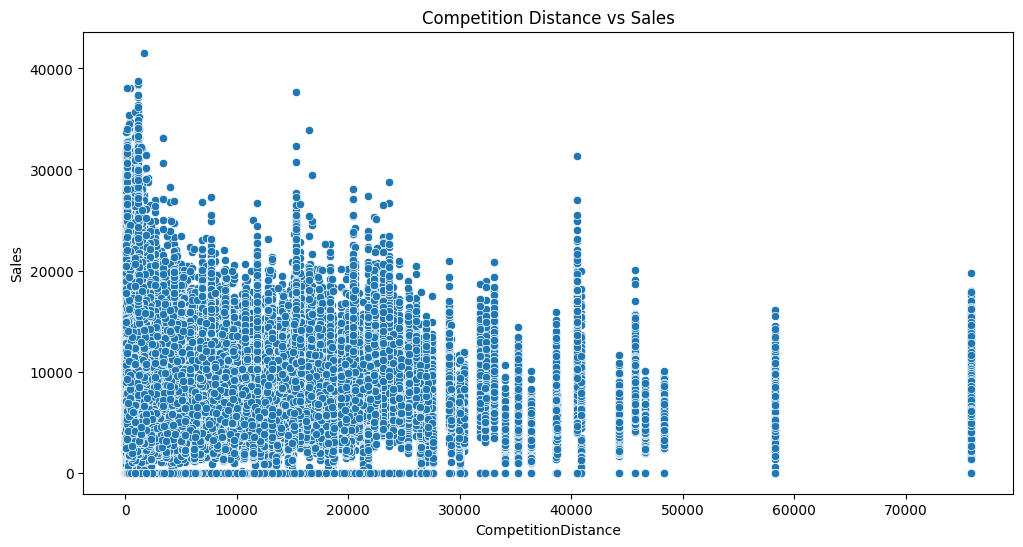

In [33]:
processing.competitor_affect_on_sales(train)

##### Impact of New Competitors on Stores

- **Goal**: Evaluate how the opening or reopening of new competitors affects store sales.
  - Identify stores where `CompetitionDistance` changes from NA to a valid value.
  - Analyze sales trends before and after competitor openings.


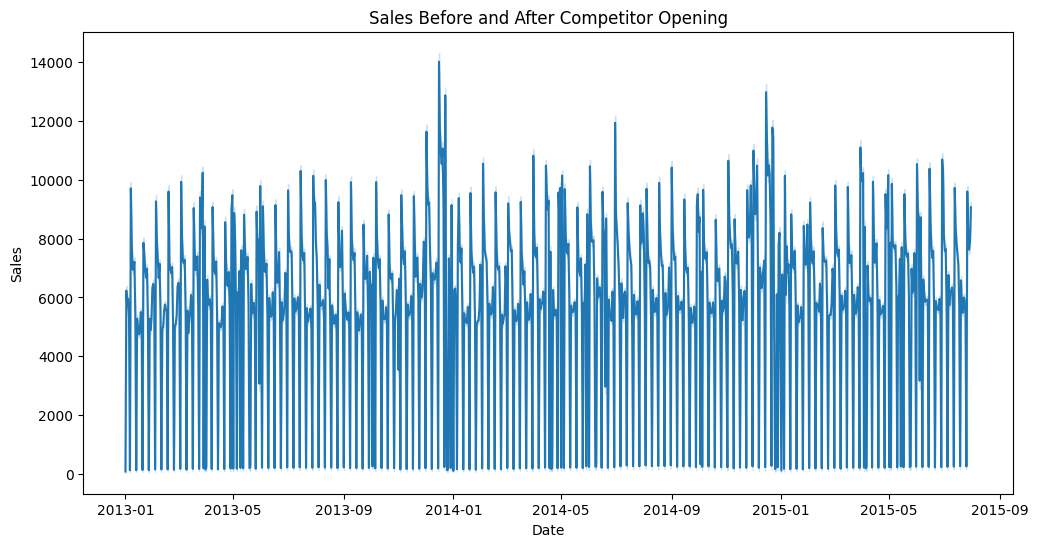

In [34]:
processing.Reopening_New_Competitors_affects(store, df_train)

#### Key Findings and Insights

1. **Proportion of Promotions in Train and Test Sets**
   - **Insight**: The distribution of promotions is balanced in both datasets, with ~60% of data points representing non-promotional periods (Promo=0).
   - **Impact on Sales**: Understanding the effects of promotions is crucial for accurate sales predictions.

2. **Sales Before, During, and After Holidays**
   - **Insight**: Substantial sales spikes occur during holidays, particularly around Christmas (StateHoliday 'a'). Non-holiday periods also show significant sales.
   - **Impact on Sales**: Holiday seasons, especially Christmas, are critical for sales, indicating the need for inventory increases and targeted promotions during these times.

3. **Promo Effectiveness by Store Type**
   - **Insight**: Promotions consistently boost sales across all store types, with store type 'b' showing the highest sales increase during promotional periods.
   - **Impact on Sales**: Tailoring promotions to store types that respond best can significantly enhance overall sales performance.
